# Properties of gas mixture at 1000K

## Viscosity 

Pure monatomic gas [1] with mass of a single molecule $m=M/N_A$ where $M$ is the molar mass and $N_A$ the Avogadro constant.

$\begin{align}
\mu=&\frac{5}{16}\frac{\sqrt{\pi m \kappa T}}{\pi\sigma^2\Omega_\mu}\\
=&\frac{5}{16}\sqrt{\frac{1.3806\cdot 10^{-23}}{\pi\cdot 1000\cdot 6.022\cdot 10^{23}}}\frac{1}{(10^{-10})^2}\frac{kg}{m\cdot s}\cdot\frac{\sqrt{\left(\frac{M}{g/mol}\right)\left(\frac{T}{K}\right)}}{\left(\frac{\sigma}{\unicode{x212B}}\right)^2\Omega_\mu}\\
=&\underset{2.6696\cdot 10^{-5}}{\underbrace{\frac{5}{16}\sqrt{\frac{1.3806\cdot 10^{-23}}{\pi\cdot 1000\cdot 6.022\cdot 10^{23}}}\frac{1}{(10^{-10})^2}\frac{1000}{100}}}\frac{g}{cm\cdot s}\cdot\frac{\sqrt{\left(\frac{M}{g/mol}\right)\left(\frac{T}{K}\right)}}{\left(\frac{\sigma}{\unicode{x212B}}\right)^2\Omega_\mu}
\end{align}$

with $\kappa$ Boltzmann constant, $\sigma$ Lennard-Jones collision diameter, $\epsilon$ Lennard-Jones maximum energy of atraction between a pair of molecules, $\Omega_\mu$ collision integral for viscosity.

Empirical equation for the collision integral for viscosity [2]:

$\Omega_\mu=A\cdot(T^*)^{-B}+C\cdot exp(-D\cdot(T^*))+E\cdot exp(-F\cdot(T^*))$

$(T^*)=\kappa T/\epsilon, A=1.16145, B=0.14874, C=0.52487, D=0.77320, E=2.16178, and F=2.43787$ applicable for $0.3\le(T^*)\le 100$.

Viscosity of the gas mixture with molar fractions $x_i$ at low density by the semiempirical relation [1]:

$\mu_{mix}=\sum_{\alpha=1}^{N}\frac{x_\alpha \mu_\alpha}{\sum_\beta x_\beta\Phi_{\alpha\beta}}$

Lennard-Jones parameters [2]

i | $\sigma/\unicode{x212B}$ | $(\frac{\epsilon}{\kappa}) / K$
- | - | -
$H_2$ | 2.827 | 59.7
$CH_4$ | 3.758 | 148.6
$CO_2$ | 3.941 | 195.2
$CO$ | 3.690 | 91.7
$H_2O$ | 2.641 | 809.1
$N_2$ | 3.798 | 71.4
$O_2$ | 3.467 | 106.7

## Density

Ideal gas.

$\rho=\frac{M}{V}=\frac{p}{RT}M$

Density of mixture with molar fractions $x_i$:

$\rho=\frac{p}{RT}\sum_i x_i M_i$

## Heat capacity (constant pressure)

"NASA-polynomials" with coefficients from [3], applicable between 200K and 1000K, and between 1000K and 6000K.

$\frac{Cp}{R}=a_1+a_2 T+a_3 T^2+a_4 T^3+a_5 T^4$

Heat capacity of the gas mixture with molar fractions $x_i$:

$Cp_{mix}=\sum_i x_i Cp_i$

## Thermal conductivity

Eucken semiempirical relation for polyatomic gases at low density [1].

$\begin{align}
\lambda&=\left(Cp+\frac{5}{4}R\right)\mu\\
&=\left(\frac{Cp}{J/mol/K}+\frac{5}{4}\frac{R}{J/mol/K}\right)\frac{\mu}{kg/m/s}\frac{g/mol}{M}\cdot \frac{J}{mol K}\frac{kg}{m s}
\frac{mol}{g}\frac{1000g}{1kg}[=]\frac{W}{m K}\end{align}$

Conductivity of the gas mixture with molar fractions $x_i$ at low density by the semiempirical relation[1]:

$\lambda_{mix}=\sum_{\alpha=1}^{N}\frac{x_\alpha \lambda_\alpha}{\sum_\beta x_\beta\Phi_{\alpha\beta}}$

[1] Bird R. B., Stweart W. E., Lightfoot E. N. (2002). Transport phenomena. 2nd ed. John Wiley & Sons. New York. S. 26, 276, 864

[2] Poling B. E., Prausnitz J. M., O'Connell J. P. (2001). The properties of gases and liquids. 5th ed. McGraw-Hill. New York. S. B.1

[3] Burcat, A., & Ruscic, B. (2001). Third millennium ideal gas and condensed phase thermochemical database for combustion. Technion-Israel Institute of Technology.

In [10]:
from numpy import pi,array,exp,sqrt,piecewise,outer,linspace
from matplotlib import cycler,pyplot as plt

R=8.31446261815324 # J/mol/K
k_B=1.380649e-23 # J/K
N_A=6.02214076e+23 # 1/mol
R=k_B*N_A

labels=['H2','CH4','CO2','CO','H2O','N2','O2'] # order of components
sigma_lj=array([2.827, 3.758, 3.941, 3.69, 2.641, 3.798, 3.467]) # Lennard Jones sigma, Angström 
epsilon_lj_ov_k=array([59.7, 148.6, 195.2, 91.7, 809.1, 71.4, 106.7]) # Lennard Jones epsilon/Boltztmann k, K
M=array([2,16,44,28,18,28,32]) # g/mol
# coefficients of NASA polynomials from Burcat, A., & Ruscic, B. (2001). Third millennium ideal gas and condensed phase thermochemical database for combustion. Technion-Israel Institute of Technology.
a1_a7_low=array([x.split('\t') for x in """2,34433112	0,007980521	-1,95E-05	2,02E-08	-7,38E-12	-917,935173	0,683010238
5,14825732	-0,013700241	4,94E-05	-4,92E-08	1,70E-11	-10245,3222	-4,63322726
2,356813	0,00898413	-7,12E-06	2,46E-09	-1,43E-13	-48371,971	9,9009035
3,5795335	-0,000610354	1,02E-06	9,07E-10	-9,04E-13	-14344,086	3,5084093
4,1986352	-0,002036402	6,52E-06	-5,49E-09	1,77E-12	-30293,726	-0,84900901
3,53100528	-0,000123661	-5,03E-07	2,44E-09	-1,41E-12	-1046,97628	2,96747038
3,78245636	-0,002996734	9,85E-06	-9,68E-09	3,24E-12	-1063,94356	3,65767573
""".replace(',','.').split('\n') if len(x)>0],dtype=float) 
a1_a7_high=array([x.split('\t') for x in """2,93286575	0,000826608	-1,46E-07	1,54E-11	-6,89E-16	-813,065581	-1,02432865
1,911786	0,00960268	-3,38E-06	5,39E-10	-3,19E-14	-10099,2136	8,48241861
4,6365111	0,002741457	-9,96E-07	1,60E-10	-9,16E-15	-49024,904	-1,9348955
3,0484859	0,001351728	-4,86E-07	7,89E-11	-4,70E-15	-14266,117	6,0170977
2,6770389	0,002973182	-7,74E-07	9,44E-11	-4,27E-15	-29885,894	6,88255
2,95257637	0,0013969	-4,93E-07	7,86E-11	-4,61E-15	-923,948688	5,87188762
3,66096065	0,000656366	-1,41E-07	2,06E-11	-1,30E-15	-1215,97718	3,41536279
""".replace(',','.').split('\n') if len(x)>0],dtype=float)

Cp_R_coefs_200_1000_K=a1_a7_low[:,:4+1] # for Cp function, coefficients from a1 to a5 are applicable
Cp_R_coefs_1000_6000_K=a1_a7_high[:,:4+1] # for Cp function, coefficients from a1 to a5 are applicable

def mu(T):
    T_=outer(T,1/epsilon_lj_ov_k).squeeze() # outer handles T as array. squeeze eliminates additional dimension when T has length 1
    MT=outer(T,M).squeeze() # outer handles T as array. squeeze eliminates additional dimension when T has length 1
    omega_mu=1.16145*T_**(-0.14874)+0.52487*exp(-0.77320*T_)+2.16178*exp(-2.43787*T_)
    return 5/16*sqrt(k_B/(pi*1000*N_A))*1/1e-10**2*sqrt(MT)/(sigma_lj**2*omega_mu)


def cp(T):
    result=((200<=T)&(T<=1000))*R*Cp_R_coefs_200_1000_K.dot(pow(T,array([[0],[1],[2],[3],[4]]))).squeeze()+\
            ((1000<T)&(T<=6000))*R*Cp_R_coefs_1000_6000_K.dot(pow(T,array([[0],[1],[2],[3],[4]]))).squeeze()
    return result.T # ensure row dimension is T
                          
T=1000 # K
viscosity=mu(T)
density=101325/8.3145/T*M/1000
heat_capacity=cp(T).squeeze()
conductivity=(heat_capacity+5/4*R)*viscosity/M*1000

# mixture properties according to Bird R. B., Stweart W. E., Lightfoot E. N. (2002). Transport phenomena. 2nd ed. John Wiley & Sons. New York. S. 26, 276, 864
x=array([0,0,0,0,0,0.79,0.21])
phi=1/sqrt(8)*(1+outer(M,1/M))**(-1/2)*(1+outer(viscosity,1/viscosity)**(1/2)*outer(M,1/M)**(1/4))**2
viscosity_air=sum(viscosity*x/phi.dot(x)) # semiempirical mixing rule
conductivity_air=sum(conductivity*x/phi.dot(x)) # semiempirical mixing rule
heat_capacity_air=heat_capacity.dot(x)
density_air=101325/8.3145/T*M.dot(x)/1000

x=array([0.05,0,0,0,0.95,0,0])
phi=1/sqrt(8)*(1+outer(M,1/M))**(-1/2)*(1+outer(viscosity,1/viscosity)**(1/2)*outer(M,1/M)**(1/4))**2
viscosity_1=sum(viscosity*x/phi.dot(x)) # semiempirical mixing rule
conductivity_1=sum(conductivity*x/phi.dot(x)) # semiempirical mixing rule
heat_capacity_1=heat_capacity.dot(x)
density_1=101325/8.3145/T*M.dot(x)/1000

print(f'viscosity, density, heat capacity, conductivity at {T}K')
print('\t\tviscosity/(Pa s)\tdensity/(kg/m^3)\tCp heat cap./(J/mol/K)\tconductivity/(W/m/K)')
for i in range(len(M)):
    print('{:s}\t\t{:0.16g}\t{:0.16g}\t{:0.16g}\t{:0.16g}'.format(labels[i],viscosity[i],density[i],heat_capacity[i],conductivity[i]))
print('{:s}\t\t{:0.16g}\t{:0.16g}\t{:0.16g}\t{:0.16g}'.format('air',viscosity_air,density_air,heat_capacity_air,conductivity_air))
print('{:s}\t{:0.16g}\t{:0.16g}\t{:0.16g}\t{:0.16g}'.format('H2O:H2 95:5',viscosity_1,density_1,heat_capacity_1,conductivity_1))

viscosity, density, heat capacity, conductivity at 1000K
		viscosity/(Pa s)	density/(kg/m^3)	Cp heat cap./(J/mol/K)	conductivity/(W/m/K)
H2		1.955982693264806e-05	0.02437308316795958	30.30498670043659	0.3980235536840263
CH4		2.724647778117298e-05	0.1949846653436767	71.90360841381916	0.1401434278292605
CO2		3.915118921174217e-05	0.5362078296951108	54.35948267311666	0.05761681285305009
CO		4.029426499361585e-05	0.3412231643514342	33.19282721770769	0.06272364377917297
H2O		3.582127599676216e-05	0.2193577485116363	41.25830244395893	0.102789909125832
N2		3.948253432565145e-05	0.3412231643514342	32.71195844300502	0.06078200327628414
O2		4.76940081694413e-05	0.3899693306873533	34.8851767183697	0.0674844207325538
air		4.104115925884345e-05	0.3514598592819772	33.1683342808316	0.0620275885856075
H2O:H2 95:5	3.500986887644718e-05	0.2096085152444524	40.7106366567828	0.1249345035324873


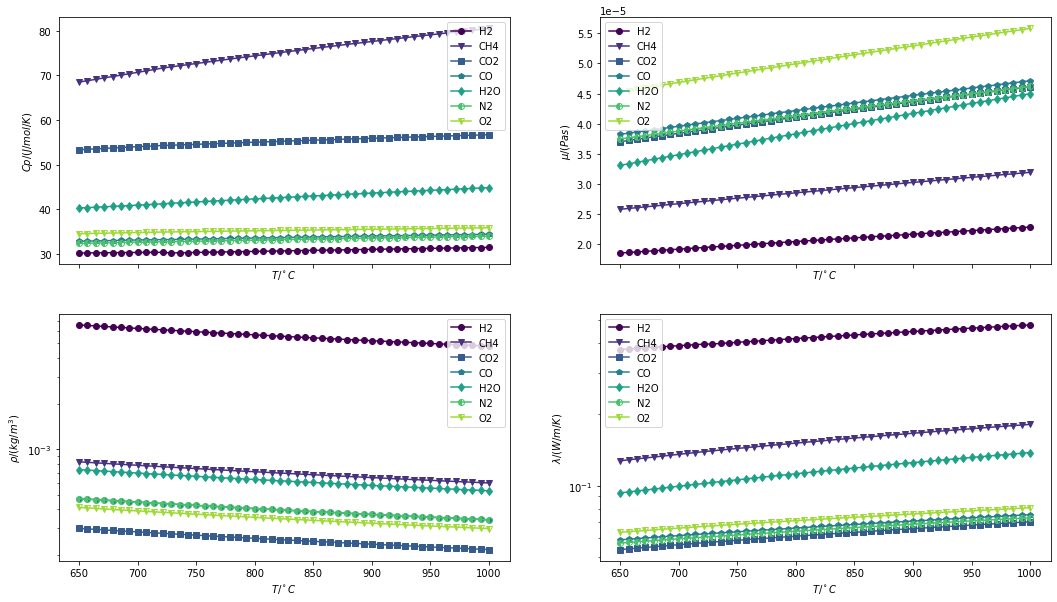

In [61]:
T=linspace(650,1000)+273.15 # K
viscosity=mu(T)
density=101325/8.3145/outer(T,M)/1000
heat_capacity=cp(T)
conductivity=(heat_capacity+5/4*R)*viscosity/M*1000

fig,ax=plt.subplots(2,2,sharex=True)
fig.set_size_inches(10*16/9,10)

base_cm_1 = plt.get_cmap('viridis') # get colormap viridis
base_cm_2 = plt.get_cmap('inferno') # get colormap inferno
# join both selected color maps and split result into 9 parts
color_samples = array([
    *base_cm_1(linspace(0, 1, 8))[:, :3],
    *base_cm_2(linspace(0, 1, 12))[:, :3]
])
plt.rcParams['axes.prop_cycle'] = cycler(
    fillstyle=['full','left','bottom','right'])*cycler(
    marker=['o', 'v','s', 'p', 'd'])+cycler(
    color=color_samples) # set color and marker cycle

ax[0,0].plot(T-273.15,heat_capacity)
ax[0,0].set_xlabel(r'$T / ^\circ C$')
ax[0,0].set_ylabel(r'$Cp / (J/mol/K)$')
ax[0,0].legend(labels)

ax[0,1].plot(T-273.15,viscosity)
ax[0,1].set_xlabel(r'$T / ^\circ C$')
ax[0,1].set_ylabel(r'$\mu / (Pa s)$')
ax[0,1].legend(labels)

ax[1,0].semilogy(T-273.15,density)
ax[1,0].set_xlabel(r'$T / ^\circ C$')
ax[1,0].set_ylabel(r'$\rho / (kg/m^3)$')
ax[1,0].legend(labels)

ax[1,1].plot(T-273.15,conductivity)
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel(r'$T / ^\circ C$')
ax[1,1].set_ylabel(r'$\lambda / (W/m/K)$')
ax[1,1].legend(labels);